## Understanding embeddings with Vertex AI Text-Embeddings API

### Overview

The Vertex AI Text-Embeddings API enhances the process of generating text embeddings. These text embeddings, which are numerical representations of text, play a pivotal role in many tasks involving the identification of similar items, like Google searches, online shopping recommendations, and personalized music suggestions.

You can use text embeddings for tasks like classification, outlier detection, text clustering and semantic search. You can combine semantic search with the text generation capabilities of an LLM to build a question-answering systems using Google Cloud’s Vertex AI.

### What you will learn

- The properties of word and sentence embeddings.
- How embeddings can be used to measure the semantic similarity between two pieces of text.
- How to visualize embeddings in a 2-dimensional space.


### Task 2. Generate your first embeddings


In [22]:
# 1. In the first cell run the following command to install the Google Cloud Vertex AI SDKs. To run the command, execute SHIFT+ENTER.
!pip install --quiet google-cloud-aiplatform scikit-learn ipympl plot-utils matplotlib seaborn

In [4]:
# 2. Import and initialize the Vertex AI Python SDK.
import vertexai

vertexai.init()

In [5]:
# 3. Import and load the embeddings model.
from vertexai.language_models import TextEmbeddingModel

embedding_model = TextEmbeddingModel.from_pretrained("text-embedding-004")

In [7]:
# 4. Generate a word embedding.
# This command returns a list with a single text embedding object.
# That list contains 768 items, in the form of numbers between -1 and 1, called dimensions.
# These dimensions are used to compare similarity between embeddings.
embedding = embedding_model.get_embeddings(["life"])

In [8]:
# 5. Explore the embedding generated by printing the lenght and the first 10 values.
vector = embedding[0].values
print(f"Length = {len(vector)}")
print(vector[:10])

Length = 768
[-0.010603697039186954, -0.015785258263349533, -0.010502871125936508, 0.002185781253501773, -0.07148707658052444, 0.04219384118914604, -0.010504273697733879, 0.03097270429134369, 0.03328254073858261, 0.05283762887120247]


In [9]:
# 6. Generate a sentence embedding.
embedding = embedding_model.get_embeddings(["What is the meaning of life?"])

In [10]:
# 7. Print the values for this embedding.
# Notice that it also has 768 dimensions and the list or vector, is composed of numbers between -1 and 1.
vector = embedding[0].values
print(f"Length = {len(vector)}")
print(vector[:10])

Length = 768
[-0.010626512579619884, 0.019580397754907608, 0.020961495116353035, 0.0007800217717885971, -0.06189257651567459, 0.014572087675333023, -0.0022393004037439823, 0.013389108702540398, 0.014531472697854042, 0.022664014250040054]


### Task 3. Calculate the similarity from embeddings

To calculate the similarity we will use the sklearn libraries, specifically the cosine_similarity function.


In [14]:
# 1. Import the cosine_similarity function in the sklearn libraries.
from sklearn.metrics.pairwise import cosine_similarity

In [15]:
# 2. Create 3 embeddings for 3 different sentences, so that we can compare them to each other.
emb_1 = embedding_model.get_embeddings(["What is the meaning of life?"])
emb_2 = embedding_model.get_embeddings(["How does one spend their time well on Earth?"])
emb_3 = embedding_model.get_embeddings(["Would you like a salad?"])

# Note: the reason we wrap the embeddings (a Python list) in another list is because the cosine_similarity function expects either a 2D numpy array or a list of lists.
vec_1 = [emb_1[0].values]
vec_2 = [emb_2[0].values]
vec_3 = [emb_3[0].values]

In [16]:
# 3. Print the similarity between these vectors.
# Notice that this numbers are in a very similar range. Cosine similarity can go between 0 and 1.
# But because we have a very high number of dimensions the numbers are going to be close.
# However, even if they look close, they are still very far apart from each other relatively speaking.
print(cosine_similarity(vec_1, vec_2))
print(cosine_similarity(vec_2, vec_3))
print(cosine_similarity(vec_1, vec_3))

[[0.6042384]]
[[0.3396287]]
[[0.36034201]]


### Task 4. Visualizing Embedddings

In this task, we will create embeddings for several sentences. Then we will reduce the dimensions from 768 to only 2, so that we can visualize the vectors in plot. We will see graphically that similar vectors are represented closer to one another.


In [17]:
# 1. Set up 7 sentences for our example.
in_1 = "Missing flamingo discovered at swimming pool"
in_2 = "Sea otter spotted on surfboard by beach"
in_3 = "Baby panda enjoys boat ride"
in_4 = "Breakfast themed food truck beloved by all!"
in_5 = "New curry restaurant aims to please!"
in_6 = "Python developers are wonderful people"
in_7 = "TypeScript, C++ or Java? All are great!"

input_text_lst_news = [in_1, in_2, in_3, in_4, in_5, in_6, in_7]

In [18]:
# 2. Get embeddings for all pieces of text.
embeddings = []
for input_text in input_text_lst_news:
    emb = embedding_model.get_embeddings([input_text])[0].values
    embeddings.append(emb)

In [19]:
# 3. Store them in a 2D NumPy array, with one row for each embedding.
import numpy as np

embeddings_array = np.array(embeddings)
print("Shape: " + str(embeddings_array.shape))
print(embeddings_array)

Shape: (7, 768)
[[ 0.02803496 -0.00299724 -0.01659381 ... -0.01121059 -0.00519713
  -0.02044056]
 [ 0.00485451  0.03049659 -0.01399871 ... -0.01616582 -0.03072107
   0.01834136]
 [ 0.03935665 -0.03734451 -0.06938332 ... -0.02096844 -0.01913369
   0.02881981]
 ...
 [ 0.00716709 -0.05124414  0.01775808 ...  0.00892509 -0.00407107
   0.00254001]
 [ 0.03583142 -0.05428725  0.00165318 ... -0.01935553  0.04669554
   0.02359349]
 [ 0.05533755 -0.0237293  -0.03609464 ... -0.03040388  0.02278006
   0.01252656]]


In [20]:
# 4. Reduce embeddings from 768 to 2 dimensions so that we can visualize them. We'll use principal component analysis (PCA).
from sklearn.decomposition import PCA

# Perform PCA for 2D visualization
PCA_model = PCA(n_components=2)
PCA_model.fit(embeddings_array)
new_values = PCA_model.transform(embeddings_array)

In [21]:
# 5. Show the shape of the new array.
print("Shape: " + str(new_values.shape))
print(new_values)

Shape: (7, 2)
[[ 0.49533001  0.17530328]
 [ 0.47394037  0.16537099]
 [ 0.34864739  0.11626409]
 [-0.01331229 -0.5433861 ]
 [-0.22950727 -0.56127286]
 [-0.4674816   0.36944202]
 [-0.60761662  0.27827859]]


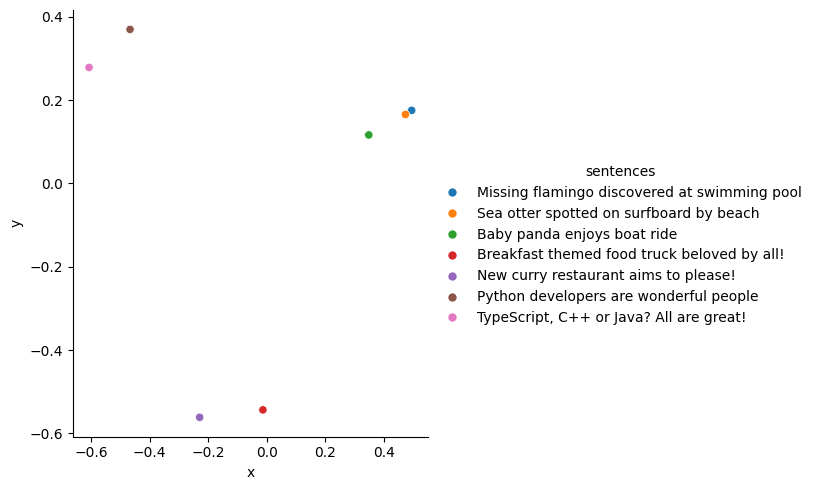

In [23]:
# 6. Visualize the output.
import seaborn as sns
import pandas as pd

data = pd.DataFrame(
    {"x": new_values[:, 0], "y": new_values[:, 1], "sentences": input_text_lst_news}
)

# Create a visualization
sns.relplot(data, x="x", y="y", kind="scatter", hue="sentences")

# Notice that similar sentences are plotted closer to each other. For instance the sentences about Python developers and programming languages are both plotted to the top left of the graph.